In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

2025-07-20 01:20:33.139600: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-20 01:20:33.152684: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 01:20:33.228489: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 01:20:33.284167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752992433.334643    7957 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752992433.34

In [3]:
data_dir = 'agri_crops/Agricultural-crops'
batch_size = 10  # same across models

# Validation set for MobileNetV2 and ResNet50V2
validation_ds_224 = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    shuffle=True,
    image_size=(224, 224),
    batch_size=batch_size,
    seed=42
)

# Validation set for EfficientNetB3
validation_ds_300 = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    shuffle=True,
    image_size=(300, 300),
    batch_size=batch_size,
    seed=42
)


Found 759 files belonging to 30 classes.
Using 151 files for validation.
Found 759 files belonging to 30 classes.
Using 151 files for validation.


2025-07-20 01:20:36.749394: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### **Comparison between 3 models**

In [4]:
model_mbn_v2 = keras.models.load_model("mobilenetv2_baseline_best.keras")
model_rn50_v2 = keras.models.load_model("resnet50v2_baseline_best.keras")
model_effnet = keras.models.load_model("efficientnetb3_baseline_best.keras")

In [5]:
val_loss_mbn, val_acc_mbn = model_mbn_v2.evaluate(validation_ds_224, verbose=0)
val_loss_rn50, val_acc_rn50 = model_rn50_v2.evaluate(validation_ds_224, verbose=0)
val_loss_eff, val_acc_eff = model_effnet.evaluate(validation_ds_300, verbose=0)

final_accuracies = {
    "MobileNetV2": val_acc_mbn,
    "ResNet50V2": val_acc_rn50,
    "EfficientNetB3": val_acc_eff,
}

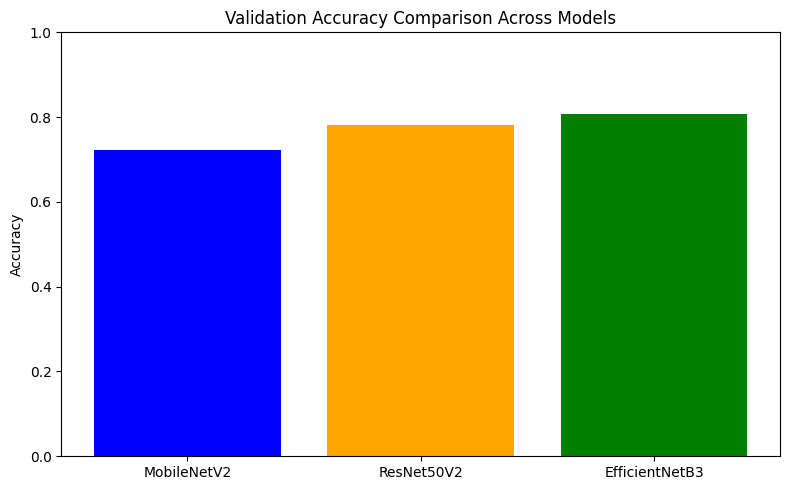

In [6]:
plt.figure(figsize=(8, 5))
plt.bar(final_accuracies.keys(), final_accuracies.values(), color=["blue", "orange", "green"])
plt.title("Validation Accuracy Comparison Across Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### **Make Prediction Using MobileNetV2**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


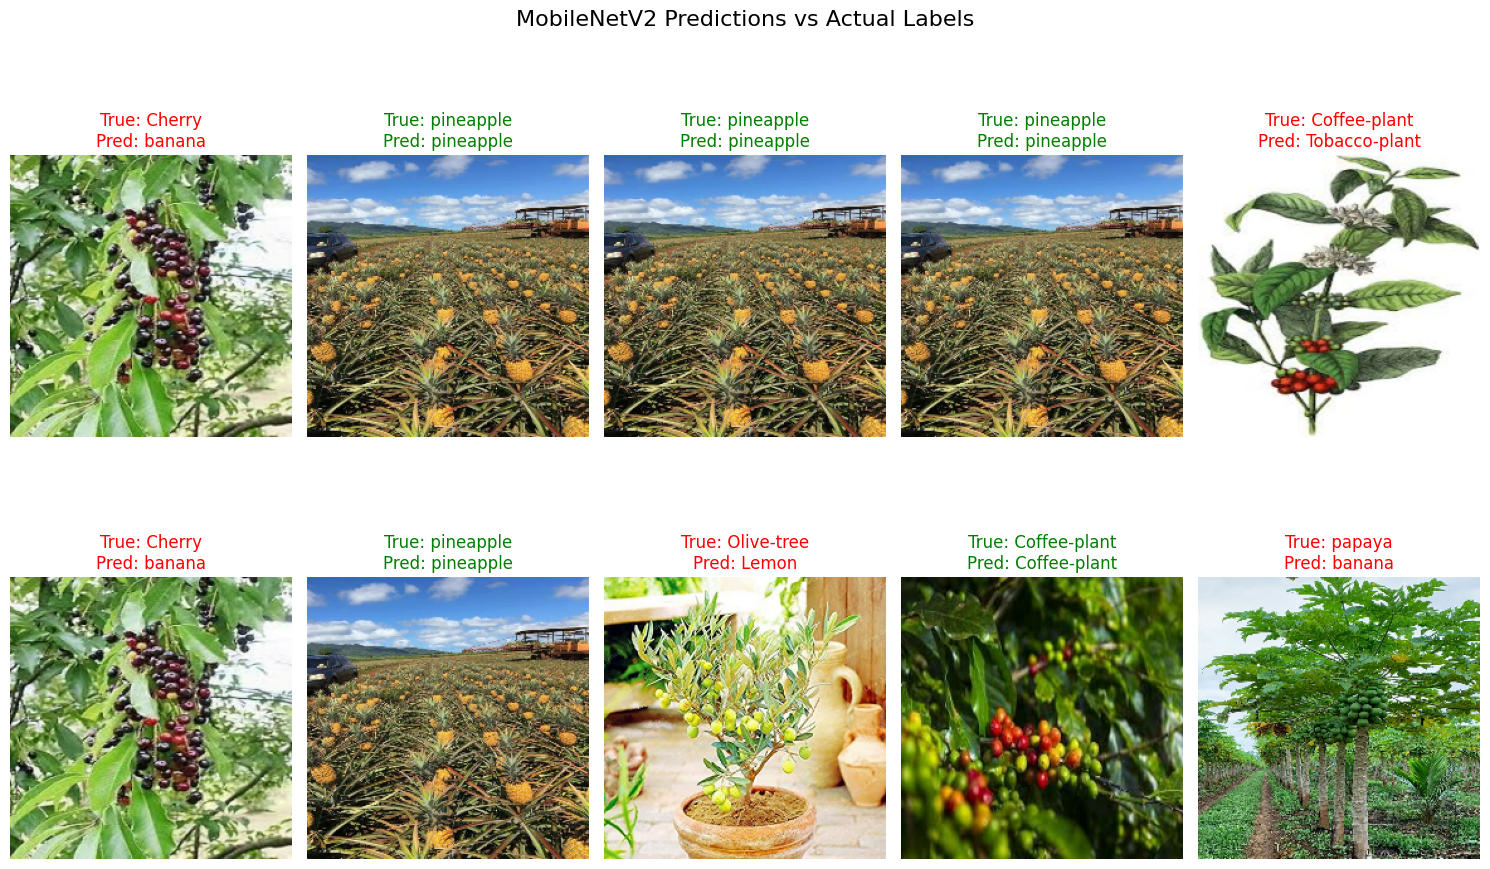

In [7]:
# Extract class name
class_names = validation_ds_224.class_names 

for images, labels in validation_ds_224.take(1):
    preds = model_mbn_v2.predict(images)
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(15, 10))
    for i in range(10):
        idx = random.randint(0, len(images) - 1)
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx].numpy().astype("uint8"))

        true_label = class_names[labels[idx]]
        predicted_label = class_names[pred_labels[idx]]

        color = "green" if true_label == predicted_label else "red"
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis("off")

    plt.suptitle("MobileNetV2 Predictions vs Actual Labels", fontsize=16)
    plt.tight_layout()
    plt.show()
    break

### **Make Prediction Using ResNet50V2**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


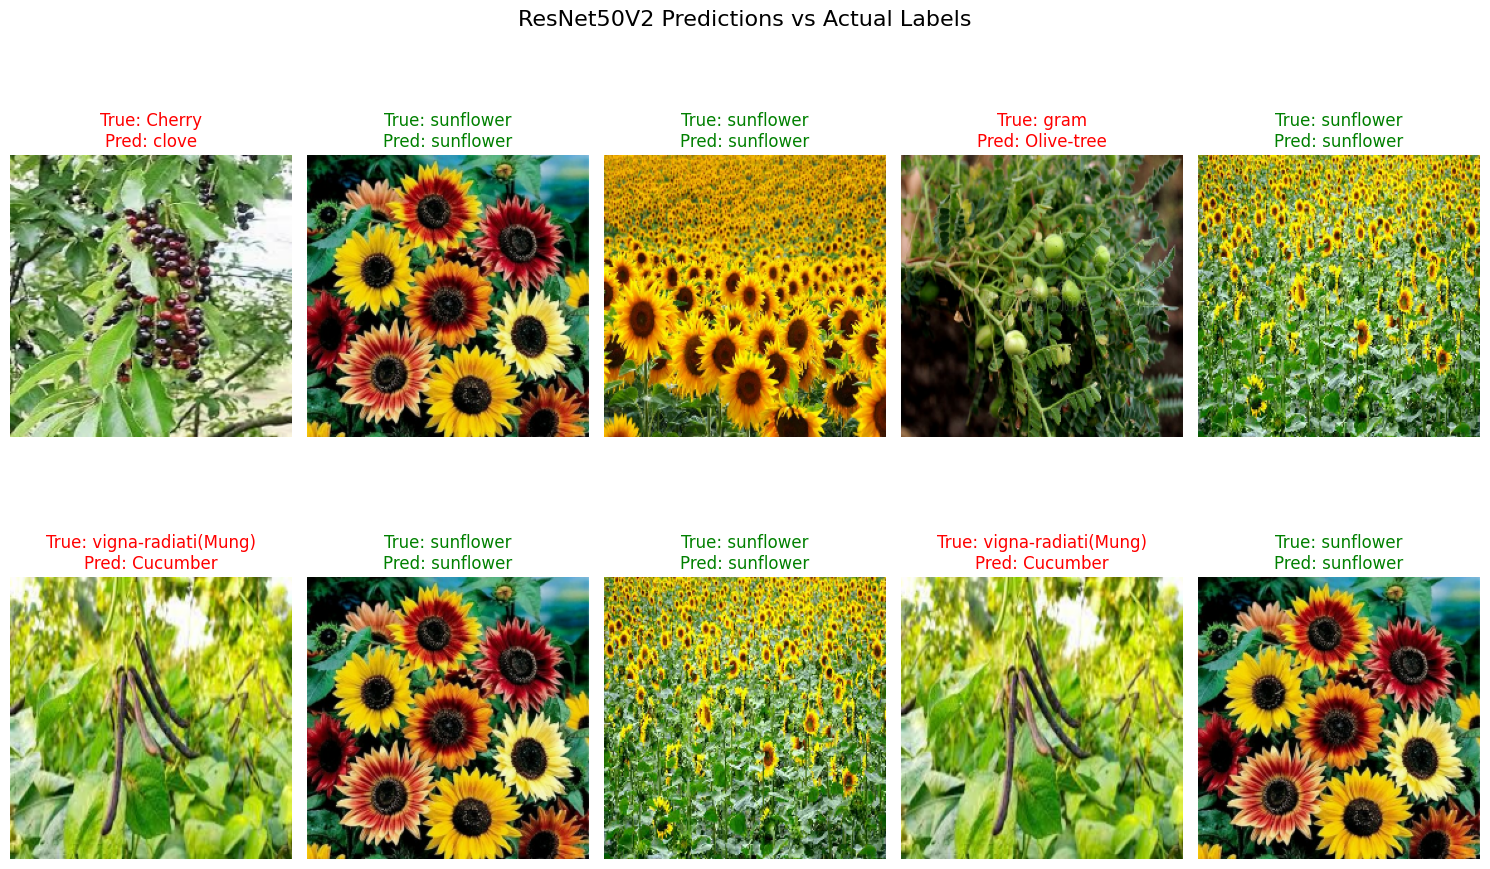

In [8]:
import random

class_names = validation_ds_224.class_names  # Same 224x224 validation set

for images, labels in validation_ds_224.take(1):
    preds = model_rn50_v2.predict(images)
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(15, 10))
    for i in range(10):
        idx = random.randint(0, len(images) - 1)
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx].numpy().astype("uint8"))

        true_label = class_names[labels[idx]]
        predicted_label = class_names[pred_labels[idx]]

        color = "green" if true_label == predicted_label else "red"
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis("off")

    plt.suptitle("ResNet50V2 Predictions vs Actual Labels", fontsize=16)
    plt.tight_layout()
    plt.show()
    break

### **Make Prediction Using EfficientNetB3**

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


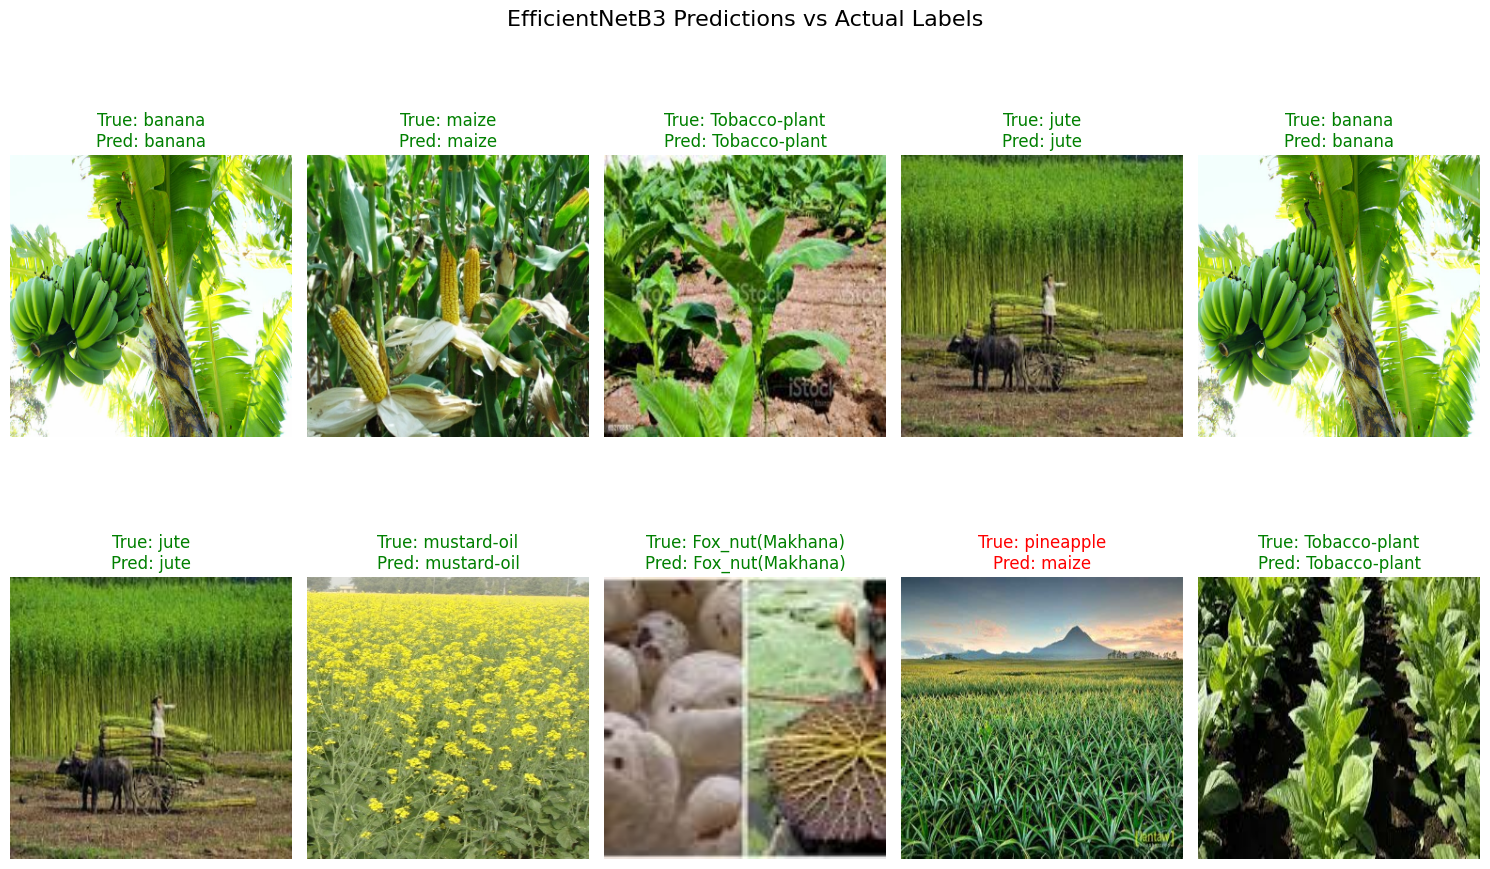

In [9]:
# Extract class name
class_names = validation_ds_300.class_names 

# Display 10 random predictions from EfficientNetB3
for images, labels in validation_ds_300.take(1):  # Use correct dataset
    preds = model_effnet.predict(images)
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(15, 10))
    for i in range(10):
        idx = random.randint(0, len(images) - 1)
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx].numpy().astype("uint8"))

        true_label = class_names[labels[idx]]
        predicted_label = class_names[pred_labels[idx]]

        color = "green" if true_label == predicted_label else "red"
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis("off")

    plt.suptitle("EfficientNetB3 Predictions vs Actual Labels", fontsize=16)
    plt.tight_layout()
    plt.show()
    break